# TUTORIAL 3: Surfaces


## Weingarten endomorphism, principal curvatures and principal directions. 
Let $f:U\subset \mathbb{R}^2 \to \mathbb{R}^3$ be a regular parameterized surface of class $C^2$. At the point $m_0=f(x_0,y_0)$ of the surface $S=f(U)$, the two vectors $\frac{\partial f}{\partial x}(x_0,y_0)$ and $\frac{\partial f}{\partial y}(x_0,y_0))$ form a basis of the tangent space of $S$ at $m_0$, which we denote $\mathcal{B}_{m_0}$. 

$\bullet$ The matrix of the first fundamental form in the basis $\mathcal{B}_{m_0}$ is given by
$$
I_{m_0}=\left(\begin{array}{cc}
E_{m_0}&F_{m_0}\\
F_{m_0}&G_{m_0}\\
\end{array}
\right)
$$
with
$$
\quad E_{m_0}=\left\| \frac{\partial f}{\partial x}(x_0,y_0)\right\|^2\quad
F_{m_0}=\langle \frac{\partial f}{\partial x}(x_0,y_0),\frac{\partial f}{\partial y}(x_0,y_0)\rangle\quad
G_{m_0}=\left\| \frac{\partial f}{\partial y}(x_0,y_0)\right\|^2
$$

$\bullet$ The matrix of the second fundamental form is given by
$$
II_{m_0}=\left(\begin{array}{cc}
L_{m_0}&M_{m_0}\\
M_{m_0}&N_{m_0}\\
\end{array}
\right)
$$
with
$$
\quad L_{m_0}=\langle \frac{\partial^2 f}{\partial x^2}(x_0,y_0),K(x_0,y_0)\rangle\quad
M_{m_0}=\langle \frac{\partial^2 f}{\partial x\partial y}(x_0,y_0),K(x_0,y_0)\rangle\quad
N_{m_0}=\langle \frac{\partial^2 f}{\partial y^2}(x_0,y_0),K(x_0,y_0)\rangle\quad
$$
where $K(x_0,y_0)=\frac{\frac{\partial f}{\partial x}(x_0,y_0)\wedge\frac{\partial f}{\partial y}(x_0,y_0)}{\|\frac{\partial f}{\partial x}(x_0,y_0)\wedge\frac{\partial f}{\partial y}(x_0,y_0)\|}$.

$\bullet$ The matrix of the Weingarten endomorphism at $m_0$ in the basis $\mathcal{B}_{m_0}$ is given by 
$$
A_{m_0}= I_{m_0}^{-1} II_{m_0}
$$
The eigenvalues $\lambda_1$ and $\lambda_2$ of $A_{m_0}$ are called the principal curvatures.

The eigenvectors $\vec{e_1}$ and $\vec{e_2}$ of $A_{m_0}$ are called the principal directions. Their coordinates are in the basis $\mathcal{B}_{m_0}$. These two vector can also be seen as vectors in the space. 


# PART 1. Numerical computation of principal directions
We want to compute a function that numerically compute the principal vectors and principal directions of a paramatrized surface $f:U\to \mathbb{R}^2$ at a point $f(x_0,y_0)$. Namely, we want to define a function whose signature can for instance be 
$$
\textbf{def principal}(f, x_0, y_0, h=0.001):
$$

In [53]:
import numpy as np
import scipy.linalg
from scipy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [54]:
def partial_derivatives(f, x0, y0, h=0.001):

    fx = (f(x0 + h, y0) - f(x0 - h, y0)) / (2 * h)
    fy = (f(x0, y0 + h) - f(x0, y0 - h)) / (2 * h)
    
    fxx = (f(x0 + h, y0) - 2*f(x0, y0) + f(x0 - h, y0)) / (h**2)
    fyy = (f(x0, y0 + h) - 2*f(x0, y0) + f(x0, y0 - h)) / (h**2)
    fxy = (f(x0 + h, y0 + h) - f(x0 + h, y0 - h) - f(x0 - h, y0 + h) + f(x0 - h, y0 - h)) / (4 * h**2)
    
    return fx, fy, fxx, fxy, fyy

def first_fundamental_form(fx, fy):
    E = np.dot(fx, fx)
    F = np.dot(fx, fy)
    G = np.dot(fy, fy)
    
    I = np.array([[E, F], [F, G]])
    return I

def second_fundamental_form(fx, fy, fxx, fxy, fyy):
    
    # Normal vector (unit)
    normal = np.cross(fx, fy)
    normal_unit = normal / np.linalg.norm(normal)
    
    L = np.dot(fxx, normal_unit)
    M = np.dot(fxy, normal_unit)
    N = np.dot(fyy, normal_unit)
    
    II = np.array([[L, M], [M, N]])
    return II

def weingarten_endomorphism(I, II):
   
    A = np.linalg.solve(I, II)
    return A

def principal_curvatures_and_directions(A):
    
    eigenvalues, eigenvectors = np.linalg.eig(A)
    return eigenvalues, eigenvectors

def principal(f, x0, y0, h=0.001):
    
    # Compute partial derivatives
    fx, fy, fxx, fxy, fyy = partial_derivatives(f, x0, y0, h)
    
    # Compute fundamental forms
    I = first_fundamental_form(fx, fy)
    II = second_fundamental_form(fx, fy, fxx, fxy, fyy)
    
    # Compute Weingarten endomorphism
    A = weingarten_endomorphism(I, II)
    
    # Compute principal curvatures and directions
    eigenvalues, eigenvectors = principal_curvatures_and_directions(A)
    
    return eigenvalues, eigenvectors, fx, fy

def principal_directions_3d(eigenvectors, fx, fy):
    
    e1_param = eigenvectors[:, 0]
    e2_param = eigenvectors[:, 1]
    
    e1_3d = e1_param[0] * fx + e1_param[1] * fy
    e2_3d = e2_param[0] * fx + e2_param[1] * fy
    
    # Normalize
    e1_3d = e1_3d / np.linalg.norm(e1_3d)
    e2_3d = e2_3d / np.linalg.norm(e2_3d)
    
    return e1_3d, e2_3d


  # PART 2. Application to different surfaces
  ## 1) PRINCIPAL DIRECTIONS OF THE CONE
 Below we give a parametrization of a cone of apex $(0,0,0)$ and vertical axis $(0z)$ and plot it


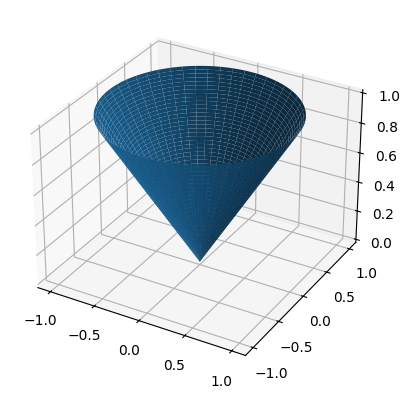

In [55]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.axes(projection ='3d')
#ax = fig.gca()#(projection='3d')

n = 1000
# Parametrization of a cone
u = np.linspace(0,2*np.pi,n)
v = np.linspace(0,1,n)
u,v = np.meshgrid(u,v)

x = v*np.cos(u)
y = v*np.sin(u)
z = v

# plot of the cone
ax.plot_surface(x,y,z)
#ax.contour(x,y,z)

### At some points  $m_0=f(x_0,y_0)$:
### - Calculate the principal curvatures $\lambda_1$ and $\lambda_2$ and principal directions $\vec{e_1}$ and $\vec{e_2}$.
### -  Plot the segments $C_1 = \{m_0 + t \vec{e_1},\ t\in[-1,1]\}$ and $C_2 = \{m_0 + t \vec{e_2},\ t\in[-1,1]\}$ 
### -  What do you observe ?

In [56]:
def plot_single_view(ax, surface_func, u_range, v_range, m0, e1_3d, e2_3d, eigenvalues,
                    surface_color, surface_name, segment_scale, view_angle, title_suffix=""):
    """Helper function to plot a single view of a surface with principal direction segments."""
    n = 50
    u = np.linspace(u_range[0], u_range[1], n)
    v = np.linspace(v_range[0], v_range[1], n)
    u_mesh, v_mesh = np.meshgrid(u, v)
    
    surface_points = np.array([surface_func(u_val, v_val) 
                             for u_val, v_val in zip(u_mesh.flatten(), v_mesh.flatten())])
    x_mesh = surface_points[:, 0].reshape(u_mesh.shape)
    y_mesh = surface_points[:, 1].reshape(u_mesh.shape)
    z_mesh = surface_points[:, 2].reshape(u_mesh.shape)
    
    ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.3, color=surface_color)
    
    ax.scatter(*m0, color='red', s=200, label='Point m0', 
              edgecolors='darkred', linewidths=2)
    
    t_vals = np.linspace(-1, 1, 100)
    
    C1 = np.array([m0 + t * segment_scale * e1_3d for t in t_vals])
    ax.plot(C1[:, 0], C1[:, 1], C1[:, 2], 'r-', linewidth=5, 
            label=f'C1: m0 + t·e1 (κ = {eigenvalues[0]:.3f})', alpha=0.8)
    
    C2 = np.array([m0 + t * segment_scale * e2_3d for t in t_vals])
    ax.plot(C2[:, 0], C2[:, 1], C2[:, 2], 'g-', linewidth=5, 
            label=f'C2: m0 + t·e2 (κ = {eigenvalues[1]:.3f})', alpha=0.8)
    
    ax.view_init(elev=view_angle[0], azim=view_angle[1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'{surface_name} with Principal Direction Segments{title_suffix}')
    ax.set_box_aspect([1,1,1])
    ax.legend()

def plot_surface_and_segments(surface_func, u_range, v_range, test_point, 
                              surface_color='lightblue', surface_name='Surface', 
                              segment_scale=0.3, view_angles=[(20, 45), (30, 60)]):
    u0, v0 = test_point
    eigenvalues, eigenvectors, fx, fy = principal(surface_func, u0, v0)
    e1_3d, e2_3d = principal_directions_3d(eigenvectors, fx, fy)
    m0 = surface_func(u0, v0)
    
    fig = plt.figure(figsize=(15, 6))
    
    for i, angle in enumerate(view_angles):
        ax = fig.add_subplot(1, len(view_angles), i+1, projection='3d')
        plot_single_view(ax, surface_func, u_range, v_range, m0, e1_3d, e2_3d, 
                        eigenvalues, surface_color, surface_name, segment_scale, 
                        angle, f" - View {i+1}")
    
    plt.tight_layout()
    plt.show()

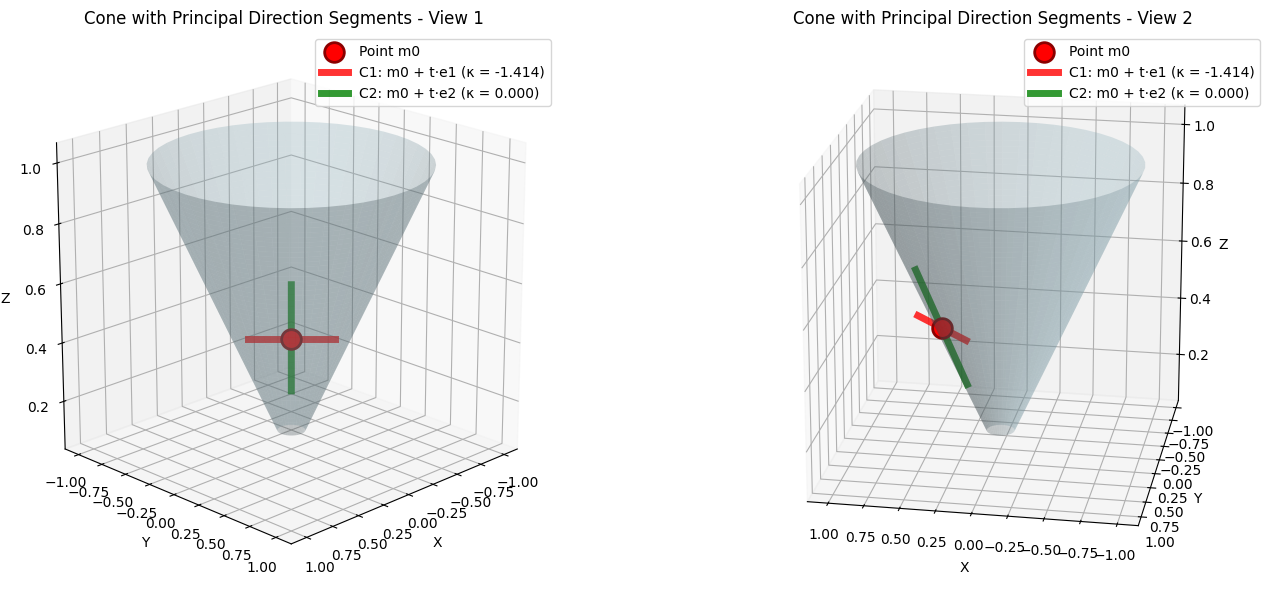

In [57]:
def cone(u, v):
    """Parametrization of a cone: f(u,v) = (v*cos(u), v*sin(u), v)"""
    x = v * np.cos(u)
    y = v * np.sin(u)
    z = v
    return np.array([x, y, z])

plot_surface_and_segments(
    surface_func=cone,
    u_range=(0, 2*np.pi),
    v_range=(0.1, 1),  
    test_point=(np.pi/4, 0.5),
    surface_color='lightblue',
    surface_name='Cone',
    segment_scale=0.3,
    view_angles=[(20, 45), (20, 100)]
)

   ## 2) PRINCIPAL DIRECTIONS OF THE HYPERBOLOIDE OF REVOLUTION
 The hyperboloid of revolution is parametrized by
 $$
 \begin{array}{rlll}
 f:&[0,2\pi]\times [-H,H] &\to &\mathbb{R}^3\\
 &(u,v)&\mapsto & (\cos u, \sin u,0)+ v (-\sin u,\cos u,1)\\
 \end{array}
 $$
### At some points  $m_0=f(x_0,y_0)$:
### -  Plot the segments $C_1 = \{m_0 + t \vec{e_1},\ t\in[-1,1]\}$ and $C_2 = \{m_0 + t \vec{e_2},\ t\in[-1,1]\}$ 
### -  What do you observe ?

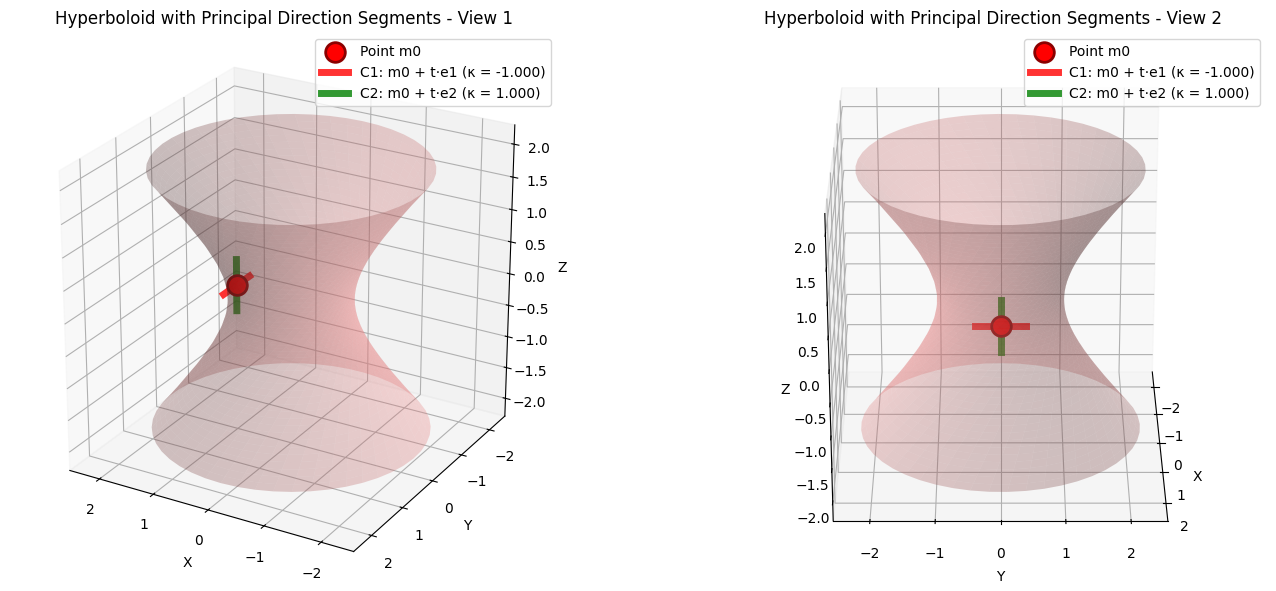

In [75]:
def hyperboloid(u, v):
    """Parametrization of hyperboloid: f(u,v) = (cos(u), sin(u), 0) + v*(-sin(u), cos(u), 1)"""
    x = np.cos(u) + v * (-np.sin(u))
    y = np.sin(u) + v * np.cos(u)
    z = v
    return np.array([x, y, z])

plot_surface_and_segments(
    surface_func=hyperboloid,
    u_range=(0, 2*np.pi),
    v_range=(-2, 2),
    test_point=(0, 0),
    surface_color='lightcoral',
    surface_name='Hyperboloid',
    segment_scale=0.4,
    view_angles=[(25, 120), (25, 0)]
)

## 3) Sphere
Same questions with the sphere

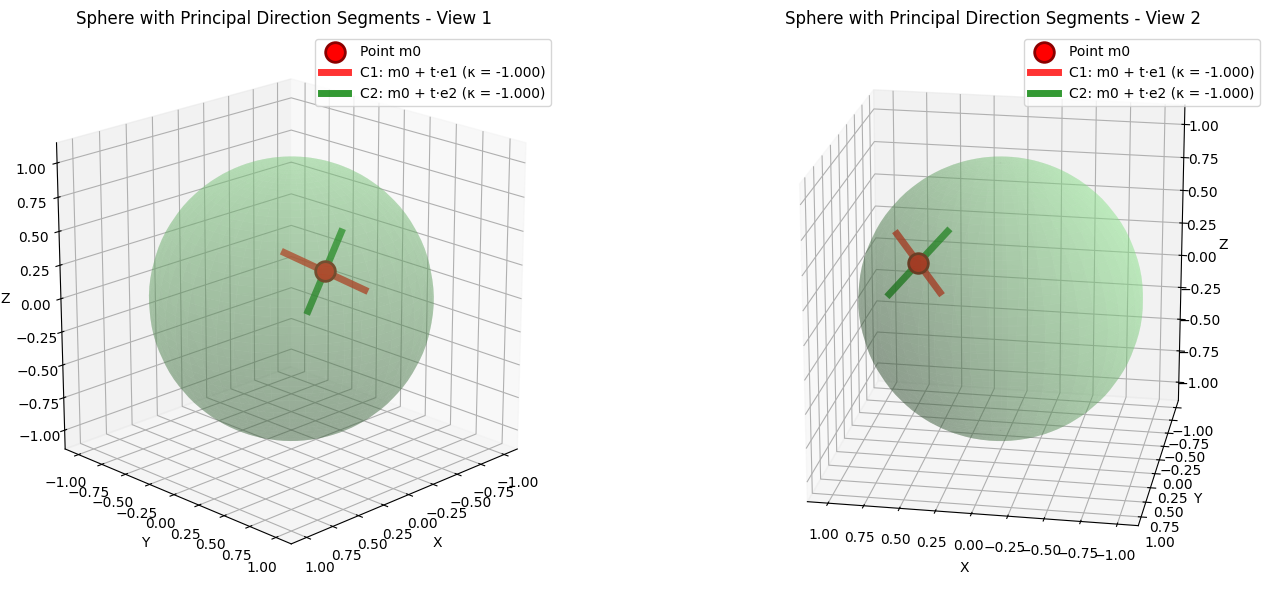

In [59]:
# Define sphere surface function
def sphere(u, v, R=1):
    """Parametrization of a sphere: f(u,v) = R*(cos(v)*cos(u), cos(v)*sin(u), sin(v))"""
    x = R * np.cos(v) * np.cos(u)
    y = R * np.cos(v) * np.sin(u)  
    z = R * np.sin(v)
    return np.array([x, y, z])

# Plot sphere
plot_surface_and_segments(
    surface_func=sphere,
    u_range=(0, 2*np.pi),
    v_range=(-np.pi/2, np.pi/2),
    test_point=(np.pi/3, np.pi/6),
    surface_color='lightgreen',
    surface_name='Sphere',
    segment_scale=0.3,
    view_angles=[(20, 45), (20, 100)]
)

# 4) Helicoid
We consider the helicoid parametrized by 
$$
f(r,\theta) = (r \cos (\alpha \theta), r \sin (\alpha \theta), \theta)
\quad \text{with} \quad  r\in [0,R]\quad \text{and}\quad \theta \in [0,2\pi[. 
$$
## - Calculate the mean curvature of the helicoid at every point ($\lambda_1+\lambda_2$).


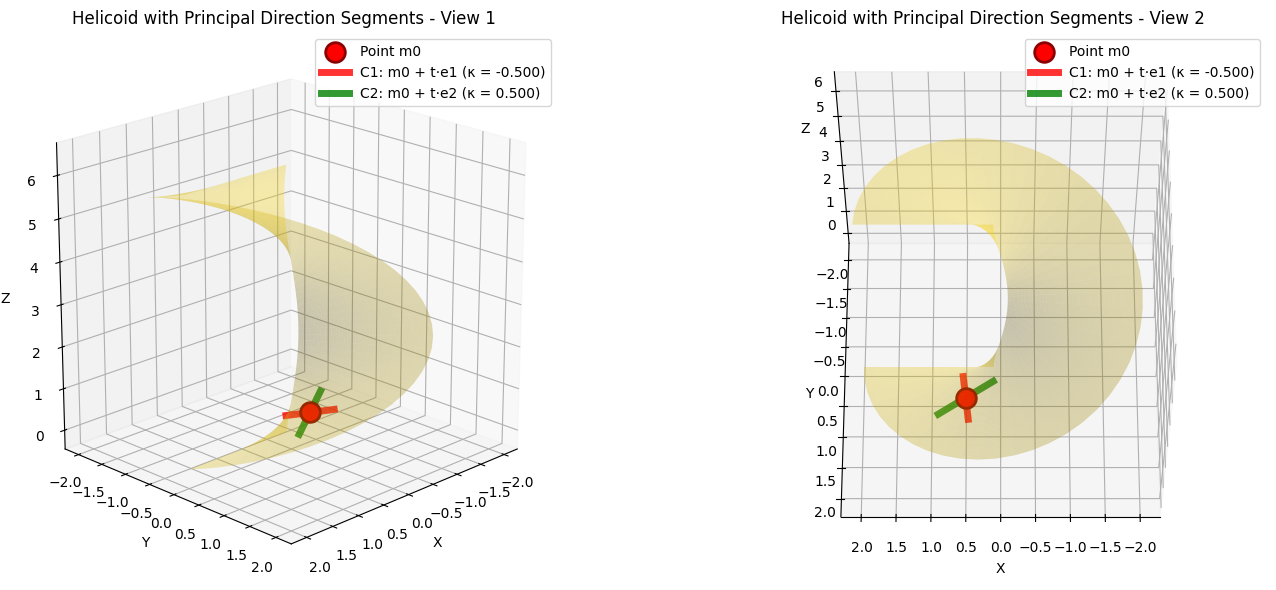

Principal curvatures: λ₁ = -0.500000, λ₂ = 0.500000
Mean curvature (λ₁ + λ₂) = 0.000000


In [71]:
def helicoid(r, theta, alpha=1):
    """Parametrization of helicoid: f(r,θ) = (r*cos(αθ), r*sin(αθ), θ)"""
    x = r * np.cos(alpha * theta)
    y = r * np.sin(alpha * theta)
    z = theta
    return np.array([x, y, z])

plot_surface_and_segments(
    surface_func=lambda r, theta: helicoid(r, theta, alpha=1),
    u_range=(0.1, 2),      # r range
    v_range=(0, 2*np.pi),  # theta range
    test_point=(1.0, np.pi/3),
    surface_color='gold',
    surface_name='Helicoid',
    segment_scale=0.5,
    view_angles=[(20, 45), (60, 90)]
)

r0, theta0 = 1.0, np.pi/3
eigenvalues, _, _, _ = principal(lambda r, theta: helicoid(r, theta, alpha=1), r0, theta0)
mean_curvature = eigenvalues[0] + eigenvalues[1]

print(f"Principal curvatures: λ₁ = {eigenvalues[0]:.6f}, λ₂ = {eigenvalues[1]:.6f}")
print(f"Mean curvature (λ₁ + λ₂) = {mean_curvature:.6f}")